In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DART_project/LSTM훈련용 Dataset/train_dataset_1007.csv')

In [14]:
!pip install pickle5
import pickle5
with open('/content/drive/MyDrive/DART_project/dataset/quantative_analysis_df_v053004.pkl','rb') as f:
  df = pickle5.load(f)

     |████████████████████████████████| 133kB 30.7MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219240 sha256=46428231f1e31ed5c488925cea6bd9cfc77a16e7750c76717d0b44db7d867872
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [18]:
df

,DATE,NAME,SECTOR,OPEN,HIGH,LOW,CLOSE,VOLUME,1M_CLOSE_STD,PER,PBR,EPS,BPS,DIV,DPS,CAPITALIZATION,NUMB_OF_SHARES,INSTITUTION(NP),CORP(NP),INDIVIDUAL(NP),FOREIGN(NP),ASST_INC,REV_INC,PROF_INC,S_ASST_INC,REV_BPR,EQ_NPR,RA_BPR,R_RATIO,D_RATIO,F_RATIO,DEBT_R,ASST_TO,SA_C_TO,ST_TO,MA5,MA10,MA20,MA50,ADX,CCI,WILLR,RSI
0,2018-01-02,현대건설,건설,36450,37400,36100,37150,649218,729.692760,8.44,0.65,4403,56944,1.35,500,4136866669750,111355765,9961402750,-40027350,-10690380200,769004800,-1.153340,0.833140,-45.706440,99.771391,6.623698,1.321848,4.555767,181.696276,156.468083,59.791628,123.003899,0.504743,1.76932,2.227292,35810.0,35875.0,35622.50,36807.0,12.044274,153.318078,-8.620690,57.307471
1,2018-01-03,현대건설,건설,36650,37000,36200,36300,482518,724.305702,8.24,0.64,4403,56944,1.38,500,4042214269500,111355765,-595877500,126433500,6382336100,-5912892100,-1.153340,0.833140,-45.706440,99.771391,6.623698,1.321848,4.555767,181.696276,156.468083,59.791628,123.003899,0.504743,1.76932,2.227292,36090.0,35905.0,35702.50,36745.0,12.183271,92.292089,-37.931034,52.062683
2,2018-01-04,현대건설,건설,36300,38400,36300,37950,1459930,853.650292,8.62,0.67,4403,56944,1.32,500,4225951281750,111355765,22323833700,-583961200,-20026334100,-1713538400,-1.153340,0.833140,-45.706440,99.771391,6.623698,1.321848,4.555767,181.696276,156.468083,59.791628,123.003899,0.504743,1.76932,2.227292,36610.0,36070.0,35832.50,36703.0,13.522327,206.194190,-11.538462,59.761265
3,2018-01-05,현대건설,건설,38200,38600,37300,38050,655891,970.138032,8.64,0.67,4403,56944,1.31,500,4237086858250,111355765,7110992800,98846200,359918900,-7569757900,-1.153340,0.833140,-45.706440,99.771391,6.623698,1.321848,4.555767,181.696276,156.468083,59.791628,123.003899,0.504743,1.76932,2.227292,37150.0,36295.0,35897.50,36663.0,14.910828,188.419405,-13.414634,60.178666
4,2018-01-08,현대건설,건설,38000,38550,37400,38350,577188,1136.080398,8.71,0.67,4403,56944,1.30,500,4270493587750,111355765,1486355000,-32587400,-2896717650,1442950050,-1.153340,0.833140,-45.706440,99.771391,6.623698,1.321848,4.555767,181.696276,156.468083,59.791628,123.003899,0.504743,1.76932,2.227292,37560.0,36520.0,36012.50,36630.0,16.200150,153.724271,-6.097561,61.469930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35419,2020-12-23,계양전기,자동차부품,3935,5090,3795,5070,21751672,397.543140,1267.50,0.93,4,5425,0.69,35,165282000000,32600000,41768950,63320480,1759849200,-1864938630,-2.613665,-9.215402,348.373093,113.309808,-3.289489,3.288849,-4.002297,186.503773,127.491594,70.497393,45.915034,0.425600,1.68058,1.783505,4216.0,3862.5,3646.50,3341.6,48.845956,184.406324,-1.117318,77.888111
35420,2020-12-24,계양전기,자동차부품,4875,4900,4190,4205,6952461,413.160167,1051.25,0.78,4,5425,0.83,35,137083000000,32600000,-52434360,-68717405,-48356695,169508460,-2.613665,-9.215402,348.373093,113.309808,-3.289489,3.288849,-4.002297,186.503773,127.491594,70.497393,45.915034,0.425600,1.68058,1.783505,4352.0,3930.0,3686.25,3359.5,50.136906,110.306029,-49.441341,58.095712
35421,2020-12-28,계양전기,자동차부품,4260,4500,4055,4190,5965059,442.223007,1047.50,0.77,4,5425,0.84,35,136594000000,32600000,-1531710,15290745,361090990,-374850025,-2.613665,-9.215402,348.373093,113.309808,-3.289489,3.288849,-4.002297,186.503773,127.491594,70.497393,45.915034,0.425600,1.68058,1.783505,4351.0,3995.0,3724.75,3378.2,50.663576,65.764523,-50.991501,57.821317
35422,2020-12-29,계양전기,자동차부품,4150,4275,4110,4170,1157499,441.859219,1042.50,0.77,4,5425,0.84,35,135942000000,32600000,-1657315,-204720,-147800595,149662630,-2.613665,-9.215402,348.373093,113.309808,-3.289489,3.288849,-4.002297,186.503773,127.491594,70.497393,45.915034,0.425600,1.68058,1.783505,4311.0,4066.5,3763.25,3398.6,51.152627,47.069541,-55.421687,57.431818


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/DART_project/LSTM훈련용 Dataset/기사labeling.xlsx')
data.rename({'제목':'title','Label':'label'},axis=1,inplace=True)

In [ ]:
full_df = data.append(df)
full_df = full_df.reset_index()
full_df.drop('index',axis=1,inplace=True)

In [ ]:
for i in range(len(full_df)):
  import re
  new_sentence = 0
  new_sentence = re.sub('[↓▼]', '하락',full_df.title[i])
  new_sentence = re.sub('[↑▲]', '상승',new_sentence)
  new_sentence = re.sub('[→]', '에서',new_sentence)
  new_sentence = re.sub(r'\[.+\]','', new_sentence)
  new_sentence = re.sub(r'[\,\'\[\]\"]','',new_sentence)
  new_sentence
  full_df.title[i] = new_sentence

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
import pickle
with open('/content/drive/MyDrive/DART_project/LSTM훈련용 Dataset/full_df.pkl', 'wb') as f:
    pickle.dump(full_df, f)

In [ ]:
import pandas as pd
test = pd.read_csv('/content/drive/MyDrive/DART_project/LSTM훈련용 Dataset/test_dataset_1007.csv')
for i in range(len(test)):
  import re
  new_sentence = 0
  new_sentence = re.sub('[↓▼]', '하락',test.title[i])
  new_sentence = re.sub('[↑▲]', '상승',new_sentence)
  new_sentence = re.sub('[→]', '에서',new_sentence)
  new_sentence
  test.title[i] = new_sentence

test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,title,label
0,더벨맘스터치 가맹점포 롯데리아 앞질러1위 우뚝,1
1,롯데리아도 맘스터치도 패스트푸드점 위생적발 5년간 50 증가,1
2,맘스터치 도시락 한 달만에 3만개 완판잘 나가는 치킨 프랜차이즈 간편식,0
3,맘스터치 먹고 뉴이스트 · 옹성우 · 여자친구 보러가자,0
4,MTM터치 연중기획공연12세계의 음악도시 오스틴 내슈빌 아바나,0
...,...,...
1495,이천수 2골에도 43 진땀승 장병들에 혼쭐난 2002 스타들,0
1496,비바100 비대면 소비 증가에창업시장 언택트 점포 열풍,1
1497,맘스터치 여름 보양식 삼계탕’으로 가정간편식 시장 출격,0
1498,대구시 국내 최대규모 프랜차이즈 창업박람회 열려,0


In [ ]:
train_data = full_df.copy()
test_data = test.copy()

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 7.4MB/s 
     |████████████████████████████████| 460kB 41.4MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']
import konlpy 
from konlpy.tag import Okt 
okt = Okt() 
X_train = [] 
for sentence in train_data['title']: 
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)

X_test = []
for sentence in test_data['title']: 
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화 
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거 
  X_test.append(temp_X)


In [ ]:
from keras.preprocessing.text import Tokenizer 
max_words = 10000 
tokenizer = Tokenizer(num_words = max_words) 
tokenizer.fit_on_texts(X_train) 

X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
import pickle
with open('/content/drive/MyDrive/DART_project/LSTM훈련용 Dataset/tokenizer.pickle','wb') as handle:
  pickle.dump(tokenizer,handle,protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
import numpy as np 
y_train = [] 
y_test = [] 
for i in range(len(train_data['label'])): 
  if train_data['label'].iloc[i] == 1: 
    y_train.append([0, 0, 1]) 
  elif train_data['label'].iloc[i] == 0:
     y_train.append([0, 1, 0])
  elif train_data['label'].iloc[i] == -1: 
    y_train.append([1, 0, 0]) 
for i in range(len(test_data['label'])): 
  if test_data['label'].iloc[i] == 1: 
    y_test.append([0, 0, 1]) 
  elif test_data['label'].iloc[i] == 0: 
    y_test.append([0, 1, 0]) 
  elif test_data['label'].iloc[i] == -1: 
    y_test.append([1, 0, 0]) 
y_train = np.array(y_train) 
y_test = np.array(y_test)


In [ ]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences 
max_len = 20 # 전체 데이터의 길이를 20로 맞춘다 
X_train = pad_sequences(X_train, maxlen=max_len) 
X_test = pad_sequences(X_test, maxlen=max_len)


In [ ]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('/content/drive/MyDrive/DART_project/LSTM훈련용 Dataset/best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=7, batch_size=10,verbose=True, validation_split=0.01)


Epoch 1/7
907/907 [==============================] - 44s 27ms/step - loss: 0.6804 - accuracy: 0.7088 - val_loss: 0.2896 - val_accuracy: 0.9022
Epoch 2/7
907/907 [==============================] - 23s 26ms/step - loss: 0.2745 - accuracy: 0.9033 - val_loss: 0.1989 - val_accuracy: 0.9457
Epoch 3/7
907/907 [==============================] - 24s 26ms/step - loss: 0.2132 - accuracy: 0.9259 - val_loss: 0.2259 - val_accuracy: 0.9348
Epoch 4/7
907/907 [==============================] - 23s 25ms/step - loss: 0.1719 - accuracy: 0.9427 - val_loss: 0.2287 - val_accuracy: 0.9239
Epoch 5/7
907/907 [==============================] - 23s 26ms/step - loss: 0.1446 - accuracy: 0.9463 - val_loss: 0.3071 - val_accuracy: 0.8696
Epoch 6/7
907/907 [==============================] - 23s 26ms/step - loss: 0.1143 - accuracy: 0.9602 - val_loss: 0.3406 - val_accuracy: 0.8696
Epoch 7/7
907/907 [==============================] - 23s 26ms/step - loss: 0.0937 - accuracy: 0.9671 - val_loss: 0.2817 - val_accuracy: 0.8913

In [ ]:
model.save('/content/drive/MyDrive/DART_project/LSTM훈련용 Dataset/best_model.h5')

from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/DART_project/LSTM훈련용 Dataset/best_model.h5')

In [ ]:
print(model.evaluate(X_test,y_test)[1]*100)

47/47 [==============================] - 2s 9ms/step - loss: 0.3965 - accuracy: 0.8833
88.33333253860474


array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)


In [ ]:
for i in range(30): 
  print("기사제목 : ", test_data['title'].iloc[i], "/\t 원래 라벨 : ", original_labels[i], "/\t예측한 라벨 : ", predict_labels[i])


test_data

기사제목 :  더벨맘스터치 가맹점포 롯데리아 앞질러1위 우뚝 /	 원래 라벨 :  2 /	예측한 라벨 :  1
기사제목 :  롯데리아도 맘스터치도 패스트푸드점 위생적발 5년간 50 증가 /	 원래 라벨 :  2 /	예측한 라벨 :  1
기사제목 :  맘스터치 도시락 한 달만에 3만개 완판잘 나가는 치킨 프랜차이즈 간편식 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 먹고 뉴이스트 · 옹성우 · 여자친구 보러가자 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  MTM터치 연중기획공연12세계의 음악도시 오스틴 내슈빌 아바나 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  기로에 선 자영업자 그래도 해법은 있다 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  단독 지금도 맥도날드서 벌레·이물질 줄줄줄반년새 21건 포스팅 충격 /	 원래 라벨 :  0 /	예측한 라벨 :  1
기사제목 :  엄지족 잡아라패스트푸드도 배달 경쟁 가세 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  더벨강소 외식프랜차이즈 리포트해마로푸드 가격·품질 두마리 토끼 잡 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 펩시 콘서트 입장권 증정 이벤트 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  국내서 1위 쫓는 해마로푸드서비스 맘스터치’해외 사업은 지지부진 /	 원래 라벨 :  2 /	예측한 라벨 :  2
기사제목 :  붐바타 창업박람회 참가제2의 맘스터치 시동건다 /	 원래 라벨 :  1 /	예측한 라벨 :  0
기사제목 :  해마로푸드 붐바타로 제2의 맘스터치 시동건다 /	 원래 라벨 :  1 /	예측한 라벨 :  1
기사제목 :  맘스터치 군대스리가 예비군편’ 추가 진행 /	 원래 라벨 :  1 /	예측한 라벨 :  2
기사제목 :  맘스터치 뉴미디어 통해 기부나눔 알리다 /	 원래 라벨 :  2 /	예측한 라벨 :  0
기사제목 :  맘스터치 필리핀 진출

IndexError: ignored

In [ ]:
import numpy as np 
predict_labels = np.argmax(predict, axis=1) 
original_labels = np.argmax(y_test, axis=1)


리뷰의 최대 길이 : 21
리뷰의 평균 길이 : 9.858066329398538


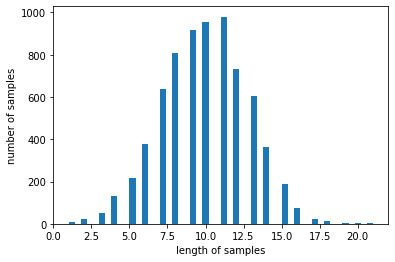

In [ ]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)



Epoch 1/15
95/95 [==============================] - 8s 62ms/step - loss: -0.2180 - acc: 0.6694 - val_loss: 2.3291 - val_acc: 0.3764

Epoch 00001: val_acc improved from -inf to 0.37640, saving model to best_model.h5
Epoch 2/15
95/95 [==============================] - 4s 47ms/step - loss: -2.9188 - acc: 0.7930 - val_loss: 1.8149 - val_acc: 0.4403

Epoch 00002: val_acc improved from 0.37640 to 0.44031, saving model to best_model.h5
Epoch 3/15
95/95 [==============================] - 4s 47ms/step - loss: -4.7646 - acc: 0.8111 - val_loss: 1.5521 - val_acc: 0.4768

Epoch 00003: val_acc improved from 0.44031 to 0.47683, saving model to best_model.h5
Epoch 4/15
95/95 [==============================] - 4s 45ms/step - loss: -6.0164 - acc: 0.8372 - val_loss: 3.8410 - val_acc: 0.4824

Epoch 00004: val_acc improved from 0.47683 to 0.48244, saving model to best_model.h5
Epoch 5/15
95/95 [==============================] - 4s 47ms/step - loss: -8.1506 - acc: 0.8399 - val_loss: 3.3151 - val_acc: 0.5042

In [ ]:
print(X_train[:3])

[[1, 212, 69, 21, 2054, 2055, 47], [1, 613, 213, 87, 268, 30], [2827, 2, 1154, 1155, 385, 253, 331, 15]]
